In [1]:
import cv2
import mediapipe as mp
import numpy as np
import uuid
import os
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import joblib

In [5]:
# Carregar os dados
data = pd.read_csv('Exerc3.csv', sep = ',')
data = data[data['gesture'] != 5]

In [7]:
data.head()

,landmark_0_x,landmark_1_x,landmark_2_x,landmark_3_x,landmark_4_x,landmark_5_x,landmark_6_x,landmark_7_x,landmark_8_x,landmark_9_x,...,landmark_12_z,landmark_13_z,landmark_14_z,landmark_15_z,landmark_16_z,landmark_17_z,landmark_18_z,landmark_19_z,landmark_20_z,gesture
0,0.498058,0.672183,8.378340e-07,0.342277,0.616667,-0.045409,0.240798,0.569616,-0.092368,0.148831,...,0.878674,0.482670,-0.167014,0.959332,0.455731,-0.190975,1.027634,0.429837,-0.205930,0
1,0.492248,0.684748,6.883661e-07,0.346329,0.623400,-0.024843,0.238253,0.568372,-0.057958,0.141337,...,0.877672,0.483748,-0.133239,0.964327,0.455335,-0.149787,1.034802,0.429653,-0.161554,0
2,0.491732,0.679269,6.709881e-07,0.348763,0.619587,-0.025718,0.241155,0.568829,-0.061278,0.145288,...,0.874126,0.482356,-0.136489,0.957881,0.454521,-0.149651,1.026051,0.429051,-0.158959,0
3,0.485211,0.682086,6.775127e-07,0.343230,0.620596,-0.025259,0.238788,0.567895,-0.058444,0.143713,...,0.864665,0.484836,-0.126508,0.946714,0.458135,-0.139905,1.013625,0.434301,-0.149921,0
4,0.485600,0.683424,6.805817e-07,0.343743,0.621414,-0.025784,0.239459,0.569004,-0.058848,0.145067,...,0.859427,0.485134,-0.117050,0.938122,0.458870,-0.129185,1.002766,0.435639,-0.138054,0


In [8]:
X = data.drop(columns=['gesture'])
y = data['gesture']

In [9]:
#Converter rótulo
label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)  #"Mão aberta" -> 0, "Mão fechada" -> 1

In [10]:
#divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
#treino do modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
#Avaliação
y_pred = model.predict(X_test)
print("Precisao:", accuracy_score(y_test, y_pred))

Precisao: 1.0


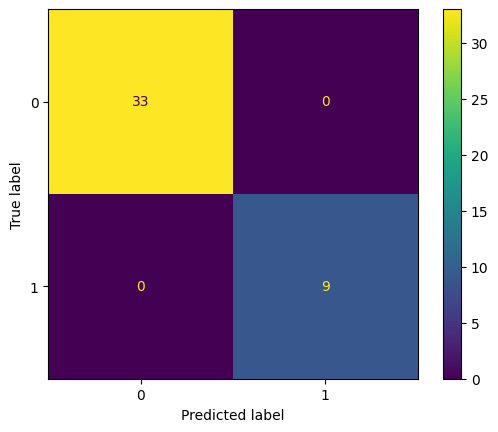

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [14]:
#Salvar modelo
joblib.dump(model, 'Modelo_Exercicio3.pkl')

['Modelo_Exercicio3.pkl']